In [1]:
import os
import rasterio
import numpy as np
from matplotlib import pyplot as plt

def calculate_ndwi(caminho_b4, caminho_b2):
    with rasterio.open(caminho_b4) as src_b4, rasterio.open(caminho_b2) as src_b2:
        # Ler os dados das bandas como matrizes numpy
        b4 = src_b4.read(1).astype(float)
        b2 = src_b2.read(1).astype(float)

        # Calcular e imprimir o maior e o menor valor em b4
        print(f'Max value in b4: {np.max(b4)}')
        if np.min(b4)==0:
            # Encontrar o menor valor em b4 maior que zero
            min_positive_b4 = np.min(b4[(b4 > 0)])
            # Exibir o menor valor presente em b4 maior que zero
            print(f'Min value in b4: {min_positive_b4}')
        else:
            print(f'Min value in b4: {np.min(b4)}')
        print(f'Max value in b2: {np.max(b2)}')
        if np.min(b2)==0:
            # Encontrar o menor valor em b2 maior que zero
            min_positive_b2 = np.min(b2[(b2 > 0)])
            # Exibir o menor valor presente em b2 maior que zero
            print(f'Min value in b2: {min_positive_b2}')
        else:
            print(f'Min value in b2: {np.min(b2)}')

        # Mostrar o número de elementos em b4
        print(f'Number of elements in b4: {np.size(b4)}')
        # Mostrar o número de elementos em b2
        print(f'Number of elements in b2: {np.size(b2)}')

        # Contar o número de elementos com valor 0 em b4
        num_zeros_b4 = np.count_nonzero(b4 == 0)
        print(f'Number of elements with value 0 in b4: {num_zeros_b4}')
        # Contar o número de elementos com valor 0 em b2
        num_zeros_b2 = np.count_nonzero(b2 == 0)
        print(f'Number of elements with value 0 in b2: {num_zeros_b2}')

        # Máscara para considerar apenas valores diferentes de zero em b4 e b2
        mask_nonzero = (b4 != 0) & (b2 != 0)

        # Calcular NDWI apenas para os valores não nulos em b4 e b2
        ndwi = np.zeros_like(b4, dtype=float)
        ndwi[mask_nonzero] = (b4[mask_nonzero] - b2[mask_nonzero]) / (b4[mask_nonzero] + b2[mask_nonzero])

        # Exibir o NDWI resultante
        print(f'Max value in ndwi: {np.max(ndwi)}')
        # Encontrar o menor valor em ndwi maior que zero
        min_positive_ndwi = np.min(ndwi[(ndwi > 0)])
        # Exibir o menor valor presente em ndwi maior que zero
        print(f'Min value in ndwi: {min_positive_ndwi}')

        # Exibir o NDWI
        #plt.subplot(1, 2, 1)
        plt.imshow(ndwi, cmap='RdYlBu', vmin=-1, vmax=1)
        plt.colorbar(label='NDWI')
        plt.title('Índice de Água Normalizado (NDWI)')

        #plt.subplot(1, 2, 2)
        #plt.imshow(ndwi, cmap='RdYlBu', vmin=min_positive_ndwi, vmax=np.max(ndwi))
        #plt.colorbar(label='NDWI')
        #plt.title('Índice de Água Normalizado (NDWI) 2')

        #plt.tight_layout()

        plt.show()

Max value in b4: 8946.0
Min value in b4: 5557.0
Max value in b2: 2189.0
Min value in b2: 478.0
Number of elements in b4: 49
Number of elements in b2: 49
Number of elements with value 0 in b4: 7
Number of elements with value 0 in b2: 7
Max value in ndwi: 0.8514374514374514
Min value in ndwi: 0.5804887901434054


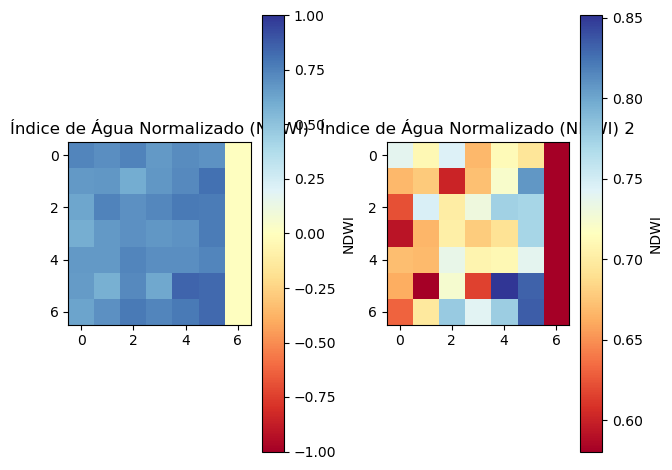

In [2]:
# Exemplo de uso da função
caminho_b4 = '/home/barcelos/Desktop/L/ML14/ML14CUTB4/2014-11-29-00:00_2014-11-29-23:59_MODIS_B4_CUT.tif'
caminho_b2 = '/home/barcelos/Desktop/L/ML14/ML14CUTB2/2014-11-29-00:00_2014-11-29-23:59_MODIS_B2_CUT.tif'
calculate_ndwi(caminho_b4, caminho_b2)